In [1]:
from models import *
from data_prep import *
from divide import *

In [2]:
df = get_fully_featured_df(categorical = True)

train, val, test = train_val_test(df, False, 'datetime')

not_features = ['datetime', 'kWh']
features = [col for col in df.columns.tolist() if col not in not_features]

In [3]:
# study, best_model, cv_score, test_score = optimize_model('XGB', train, features, trials=30)

Best parameters: {'n_estimators': 160, 'max_depth': 11, 'learning_rate': 0.09739777896244486, 'subsample': 0.84786444191068, 'colsample_bytree': 0.6607792101234875, 'gamma': 0, 'lambda': 4.4023536705643425, 'alpha': 8.308087714544902}
Nested CV RMSE: 51.901082611083986
Test set score: 0


In [10]:
params = {'n_estimators': 160, 'max_depth': 11, 'learning_rate': 0.09739777896244486, 'subsample': 0.84786444191068, 'colsample_bytree': 0.6607792101234875, 'gamma': 0, 'lambda': 4.4023536705643425, 'alpha': 8.308087714544902}

In [11]:
X = train[features]
y = train['kWh']

lgbm_model = XGBRegressor(**params)
lgbm_model.fit(X, y)

XGBRegressor(alpha=8.308087714544902, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6607792101234875, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             lambda=4.4023536705643425, learning_rate=0.09739777896244486,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=160, n_jobs=None, ...)

In [12]:
valid_preds = lgbm_model.predict(val[features])
test_preds = lgbm_model.predict(test[features])
print(f"Validation: {smape(val['kWh'], valid_preds)} \n"
      f"Test: {smape(test['kWh'], test_preds)}")

Validation: 1.5982347705696203 
Test: 1.6179916653423538


C:\Users\Lev\Documents\GitHub\ArtficialInteligenceCourseProject\models.py:233: RuntimeWarning: invalid value encountered in divide
  return np.sum(tmp) / len(tmp)
C:\Users\Lev\Documents\GitHub\ArtficialInteligenceCourseProject\models.py:233: RuntimeWarning: invalid value encountered in divide
  return np.sum(tmp) / len(tmp)
C:\Users\Lev\Documents\GitHub\ArtficialInteligenceCourseProject\models.py:233: RuntimeWarning: invalid value encountered in divide
  return np.sum(tmp) / len(tmp)
C:\Users\Lev\Documents\GitHub\ArtficialInteligenceCourseProject\models.py:233: RuntimeWarning: invalid value encountered in divide
  return np.sum(tmp) / len(tmp)
C:\Users\Lev\Documents\GitHub\ArtficialInteligenceCourseProject\models.py:233: RuntimeWarning: invalid value encountered in divide
  return np.sum(tmp) / len(tmp)
C:\Users\Lev\Documents\GitHub\ArtficialInteligenceCourseProject\models.py:233: RuntimeWarning: invalid value encountered in divide
  return np.sum(tmp) / len(tmp)
C:\Users\Lev\Documents

Average error on validation: nan
Average error on test: nan


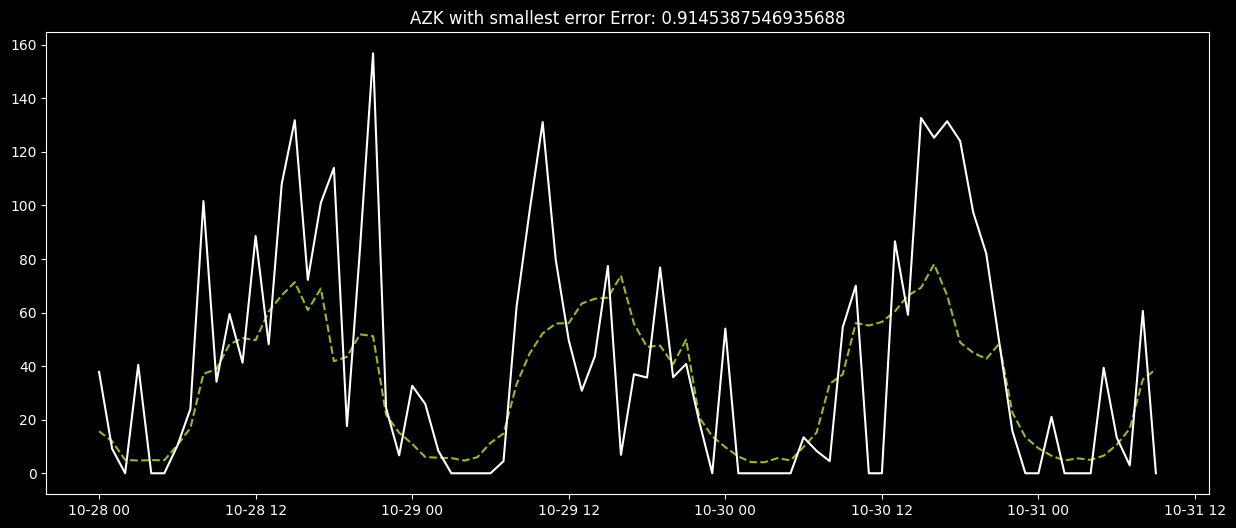

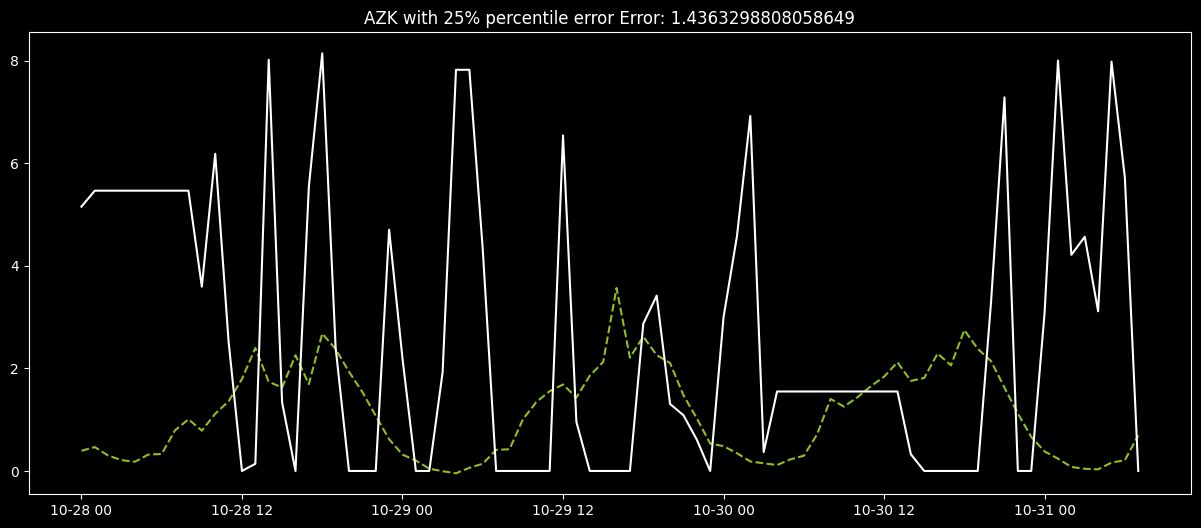

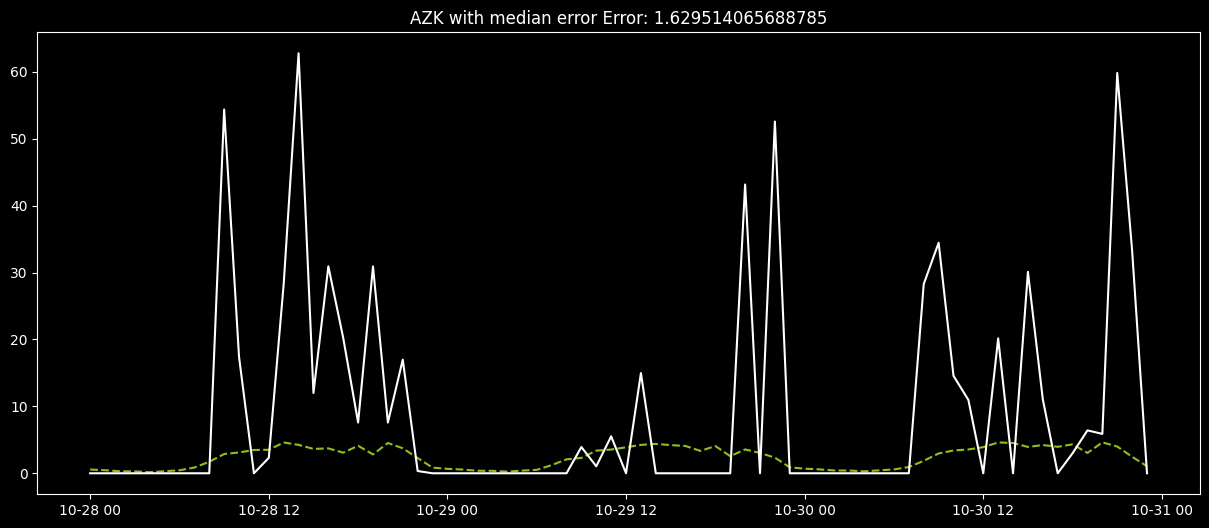

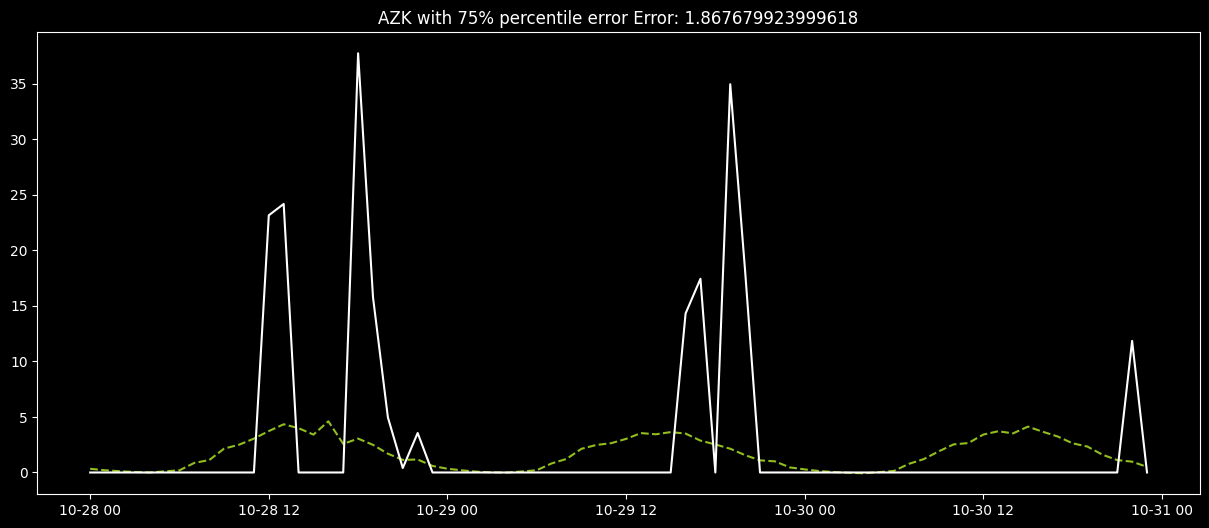

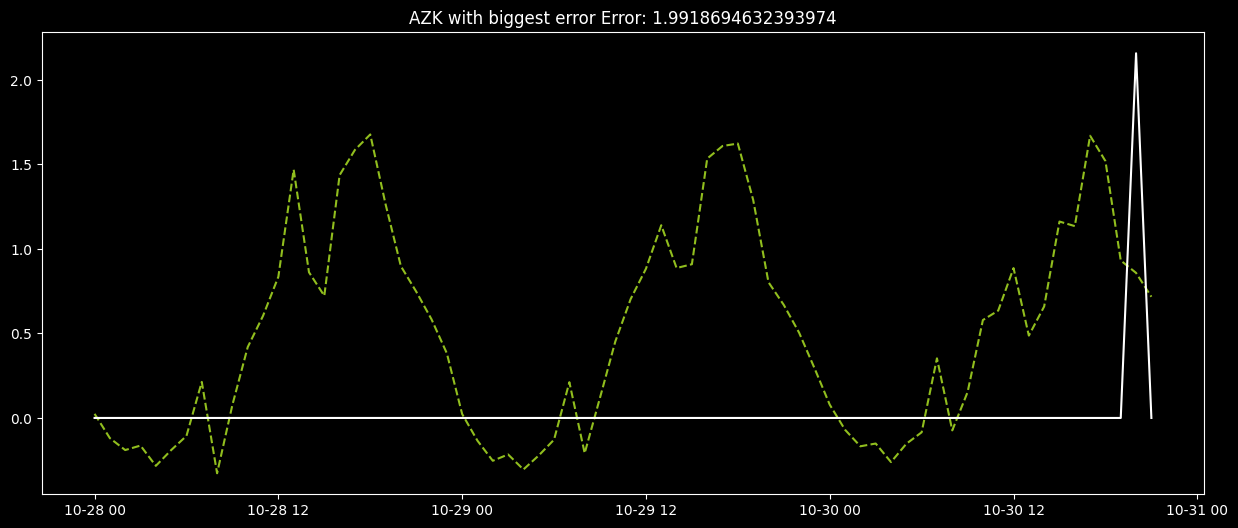

In [13]:
vizualize_percentiles(df, test, val, lgbm_model, features)

In [2]:
df = get_fully_featured_df(categorical = True)

train, val, test = train_val_test(df, True, 'datetime')

not_features = ['datetime', 'kWh']
features = [col for col in df.columns.tolist() if col not in not_features]

In [ ]:
study, best_model, cv_score, test_score = optimize_model('XGB', train, features, trials=30)

In [ ]:
X = train[features]
y = train['kWh']

lgbm_model = XGBRegressor(**study.best_params)
lgbm_model.fit(X, y)

In [ ]:
valid_preds = lgbm_model.predict(val[features])
test_preds = lgbm_model.predict(test[features])
print(f"Validation: {smape(val['kWh'], valid_preds)} \n"
      f"Test: {smape(test['kWh'], test_preds)}")

In [ ]:
vizualize_percentiles(df, test, val, lgbm_model, features)

In [ ]:
from datetime import datetime

# Get the current time
current_time = datetime.now()

# Print the current time
print("Current time:", current_time.strftime("%Y-%m-%d %H:%M:%S"))